# result analysis Virtual Ship

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cmocean
import numpy as np
from geopy import distance

import glob
import gsw
import warnings
import xarray as xr
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [10]:
adcp = xr.open_zarr("adcp.zarr").compute()
ctd = xr.open_zarr("ctd.zarr").compute()
bathy = xr.open_dataset("gebco_2024_n11.0_s3.0_w44.0_e57.0.nc")

In [34]:
ctd2=xr.open_zarr("ctd.zarr").compute()

In [19]:
ctd

<xarray.Dataset> Size: 422kB
Dimensions:      (trajectory: 24, obs: 398)
Coordinates:
  * obs          (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory   (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Data variables:
    lat          (trajectory, obs) float32 38kB 5.03 5.03 5.03 ... 9.063 nan
    lon          (trajectory, obs) float32 38kB 49.45 49.45 49.45 ... 55.83 nan
    max_depth    (trajectory, obs) float32 38kB -2e+03 -2e+03 ... -2e+03 nan
    min_depth    (trajectory, obs) float32 38kB -11.0 -11.0 -11.0 ... -11.0 nan
    raising      (trajectory, obs) float32 38kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 nan
    salinity     (trajectory, obs) float32 38kB 34.97 34.97 34.98 ... 35.11 nan
    temperature  (trajectory, obs) float32 38kB 26.26 26.26 26.26 ... 23.07 nan
    time         (trajectory, obs) datetime64[ns] 76kB 2024-09-17T23:12:00 .....
    winch_speed  (trajectory, obs) float32 38kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan
    z            (trajectory, obs) float32 38kB -11.0 -21.0 -31.0 ... -13.76 nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_salinity_sample_temperature_ct...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [4]:
adcp

<xarray.Dataset> Size: 468kB
Dimensions:     (trajectory: 40, obs: 416)
Coordinates:
  * obs         (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 409 410 411 412 413 414 415
  * trajectory  (trajectory) int64 320B 1 2 3 4 5 6 7 8 ... 34 35 36 37 38 39 40
Data variables:
    U           (trajectory, obs) float32 67kB -0.01641 -0.0164 ... 0.3864
    V           (trajectory, obs) float32 67kB -0.0464 -0.04636 ... -0.1594
    lat         (trajectory, obs) float32 67kB 5.03 5.03 5.03 ... 9.063 9.063
    lon         (trajectory, obs) float32 67kB 49.45 49.45 49.45 ... 55.83 55.83
    time        (trajectory, obs) datetime64[ns] 133kB 2024-09-17T23:12:00 .....
    z           (trajectory, obs) float32 67kB -1e+03 -1e+03 ... -5.0 -5.0
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_velocity
    parcels_mesh:           spherical
    parcels_version:        3.1.2

AttributeError: 'Colorbar' object has no attribute 'set_clim'

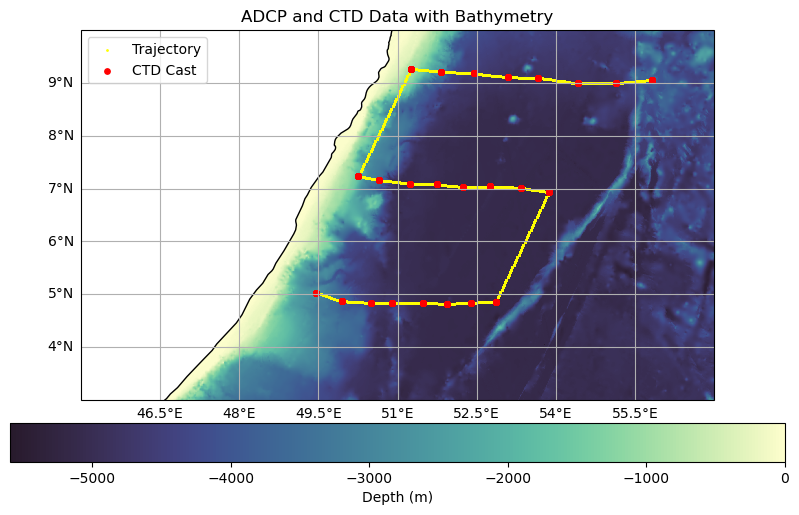

In [61]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Mask positive elevations (topography), keeping only bathymetry
bathy_masked = bathy.elevation.where(bathy.elevation <= 0)

# Plot bathymetry
cm = ax.pcolormesh(bathy.lon, bathy.lat, bathy_masked, cmap=cmocean.cm.deep_r, shading='auto')

# Plot ADCP and CTD data points
ax.scatter(adcp.lon, adcp.lat, transform=ccrs.PlateCarree(), s=1, color='yellow', label='Trajectory')
ax.scatter(ctd.lon, ctd.lat, transform=ccrs.PlateCarree(), s=15, color='red', label='CTD Cast')

# Add coastline, gridlines, and extent
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False  # Hide right labels
gl.top_labels = False  # Hide top labels
ax.set_extent((45, 57, 3, 10))

# Add title and legend
ax.set_title("ADCP and CTD Data with Bathymetry")
ax.legend(loc='upper left')

# Add colorbar with limits set from 0 downward
cbar = plt.colorbar(cm, ax=ax, orientation='horizontal', label='Depth (m)', pad=0.05)
cbar.set_clim(0, bathy_masked.min())  # Ensure colorbar goes from 0 downward

plt.show()

<xarray.DataArray 'temperature' (trajectory: 8, obs: 398)> Size: 13kB
array([[26.256418, 26.260557, 26.263231, ..., 26.250755, 26.24637 ,
              nan],
       [26.543499, 26.54375 , 26.542982, ..., 26.526728, 26.530329,
        26.532413],
       [26.001627, 26.002163, 26.006601, ..., 26.080868, 26.069557,
        26.066391],
       ...,
       [25.777933, 25.770676, 25.771212, ..., 25.787874, 25.798923,
              nan],
       [25.858656, 25.843143, 25.84032 , ..., 25.870451, 25.898726,
              nan],
       [25.959743, 25.929443, 25.903791, ..., 25.948687,       nan,
              nan]], shape=(8, 398), dtype=float32)
Coordinates:
  * obs         (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory  (trajectory) int64 64B 41 42 43 44 45 46 47 48
Attributes:
    long_name:      
    standard_name:  temperature
    units:          unknown

In [68]:
3*8


24

In [62]:
ctd

<xarray.Dataset> Size: 422kB
Dimensions:      (trajectory: 24, obs: 398)
Coordinates:
  * obs          (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory   (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Data variables:
    lat          (trajectory, obs) float32 38kB 5.03 5.03 5.03 ... 9.063 nan
    lon          (trajectory, obs) float32 38kB 49.45 49.45 49.45 ... 55.83 nan
    max_depth    (trajectory, obs) float32 38kB -2e+03 -2e+03 ... -2e+03 nan
    min_depth    (trajectory, obs) float32 38kB -11.0 -11.0 -11.0 ... -11.0 nan
    raising      (trajectory, obs) float32 38kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 nan
    salinity     (trajectory, obs) float32 38kB 34.97 34.97 34.98 ... 35.11 nan
    temperature  (trajectory, obs) float32 38kB 26.26 26.26 26.26 ... 23.07 nan
    time         (trajectory, obs) datetime64[ns] 76kB 2024-09-17T23:12:00 .....
    winch_speed  (trajectory, obs) float32 38kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan
    z            (trajectory, obs) float32 38kB -11.0 -21.0 -31.0 ... -13.76 nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_salinity_sample_temperature_ct...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

def crosssection(data, xdim='LATITUDE'):
    """convert data for 'cross section' plot (actually projection along x-axis)

    data : list of DataArray
        list of CTD cast datasets
    xdim : str
        horizontal coordinate in output

    x : 1D horizontal coordinate
    y : 1D vertical coordate (pressure)
    temp : output temperature (y,x)
    salt : output salinity (y,x)
    """
    data = [ds.squeeze() for ds in data]
    data = [data[i] for i in np.argsort([ds[xdim] for ds in data])] # sort by xdim
    x = np.array([ds[xdim].item() for ds in data])
    PMAX = np.max([ds.PRES.max() for ds in data]) # max pressure measured
    y = np.arange(1,PMAX+1,2)
    # below: one-line function taking in dataset and returning variable interpolated to pressures y
    vinterp = lambda ds, var: np.interp(y, ds.PRES, ds[var], left=np.nan, right=np.nan)
    temp = np.array([vinterp(ds, 'TEMPST01') for ds in data]).T
    salt = np.array([vinterp(ds, 'PSALPR01') for ds in data]).T
    return x,y,temp,salt

In [75]:
ctd.temperature[~np.isnan()]

TypeError: invalid indexer array, does not have integer dtype: array(<ufunc 'isnan'>, dtype=object)

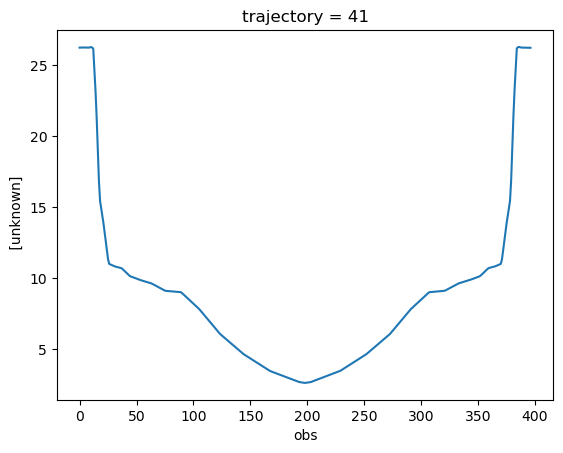

In [80]:
ctd.isel(trajectory=0).temperature.plot()

In [99]:
ctd.z.isel(trajectory=0)

<xarray.DataArray 'z' (obs: 398)> Size: 2kB
array([  -11.,   -21.,   -31.,   -41.,   -51.,   -61.,   -71.,   -81.,
         -91.,  -101.,  -111.,  -121.,  -131.,  -141.,  -151.,  -161.,
        -171.,  -181.,  -191.,  -201.,  -211.,  -221.,  -231.,  -241.,
        -251.,  -261.,  -271.,  -281.,  -291.,  -301.,  -311.,  -321.,
        -331.,  -341.,  -351.,  -361.,  -371.,  -381.,  -391.,  -401.,
        -411.,  -421.,  -431.,  -441.,  -451.,  -461.,  -471.,  -481.,
        -491.,  -501.,  -511.,  -521.,  -531.,  -541.,  -551.,  -561.,
        -571.,  -581.,  -591.,  -601.,  -611.,  -621.,  -631.,  -641.,
        -651.,  -661.,  -671.,  -681.,  -691.,  -701.,  -711.,  -721.,
        -731.,  -741.,  -751.,  -761.,  -771.,  -781.,  -791.,  -801.,
        -811.,  -821.,  -831.,  -841.,  -851.,  -861.,  -871.,  -881.,
        -891.,  -901.,  -911.,  -921.,  -931.,  -941.,  -951.,  -961.,
        -971.,  -981.,  -991., -1001., -1011., -1021., -1031., -1041.,
       -1051., -1061., -1071., -1081., -1091., -1101., -1111., -1121.,
       -1131., -1141., -1151., -1161., -1171., -1181., -1191., -1201.,
       -1211., -1221., -1231., -1241., -1251., -1261., -1271., -1281.,
       -1291., -1301., -1311., -1321., -1331., -1341., -1351., -1361.,
       -1371., -1381., -1391., -1401., -1411., -1421., -1431., -1441.,
       -1451., -1461., -1471., -1481., -1491., -1501., -1511., -1521.,
       -1531., -1541., -1551., -1561., -1571., -1581., -1591., -1601.,
...
       -1571., -1561., -1551., -1541., -1531., -1521., -1511., -1501.,
       -1491., -1481., -1471., -1461., -1451., -1441., -1431., -1421.,
       -1411., -1401., -1391., -1381., -1371., -1361., -1351., -1341.,
       -1331., -1321., -1311., -1301., -1291., -1281., -1271., -1261.,
       -1251., -1241., -1231., -1221., -1211., -1201., -1191., -1181.,
       -1171., -1161., -1151., -1141., -1131., -1121., -1111., -1101.,
       -1091., -1081., -1071., -1061., -1051., -1041., -1031., -1021.,
       -1011., -1001.,  -991.,  -981.,  -971.,  -961.,  -951.,  -941.,
        -931.,  -921.,  -911.,  -901.,  -891.,  -881.,  -871.,  -861.,
        -851.,  -841.,  -831.,  -821.,  -811.,  -801.,  -791.,  -781.,
        -771.,  -761.,  -751.,  -741.,  -731.,  -721.,  -711.,  -701.,
        -691.,  -681.,  -671.,  -661.,  -651.,  -641.,  -631.,  -621.,
        -611.,  -601.,  -591.,  -581.,  -571.,  -561.,  -551.,  -541.,
        -531.,  -521.,  -511.,  -501.,  -491.,  -481.,  -471.,  -461.,
        -451.,  -441.,  -431.,  -421.,  -411.,  -401.,  -391.,  -381.,
        -371.,  -361.,  -351.,  -341.,  -331.,  -321.,  -311.,  -301.,
        -291.,  -281.,  -271.,  -261.,  -251.,  -241.,  -231.,  -221.,
        -211.,  -201.,  -191.,  -181.,  -171.,  -161.,  -151.,  -141.,
        -131.,  -121.,  -111.,  -101.,   -91.,   -81.,   -71.,   -61.,
         -51.,   -41.,   -31.,   -21.,   -11.,    nan], dtype=float32)
Coordinates:
  * obs         (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
    trajectory  int64 8B 41
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

In [100]:
ctd

<xarray.Dataset> Size: 422kB
Dimensions:      (trajectory: 24, obs: 398)
Coordinates:
  * obs          (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory   (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Data variables:
    lat          (trajectory, obs) float32 38kB 5.03 5.03 5.03 ... 9.063 nan
    lon          (trajectory, obs) float32 38kB 49.45 49.45 49.45 ... 55.83 nan
    max_depth    (trajectory, obs) float32 38kB -2e+03 -2e+03 ... -2e+03 nan
    min_depth    (trajectory, obs) float32 38kB -11.0 -11.0 -11.0 ... -11.0 nan
    raising      (trajectory, obs) float32 38kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 nan
    salinity     (trajectory, obs) float32 38kB 34.97 34.97 34.98 ... 35.11 nan
    temperature  (trajectory, obs) float32 38kB 26.26 26.26 26.26 ... 23.07 nan
    time         (trajectory, obs) datetime64[ns] 76kB 2024-09-17T23:12:00 .....
    winch_speed  (trajectory, obs) float32 38kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan
    z            (trajectory, obs) float32 38kB -11.0 -21.0 -31.0 ... -13.76 nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_salinity_sample_temperature_ct...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [104]:
# open datasets and sort by time of ctd cast
def decode_time(ds): # needed due to non CF-compliant units
    with warnings.catch_warnings(action='ignore', category=cftime.CFWarning):
        ds['TIME'] = cftime.num2date(ds.TIME, ds.TIME.units)
    return ds

#files = glob.glob(f"{datadir}RN-9598_1707497532516/b051*.nc")
#data = [decode_time(xr.open_dataset(f, decode_times=False)) for f in files]
#data = [data[i] for i in np.argsort([ds.TIME.item() for ds in data])]
#print(f"Loaded {len(data)} profiles")

how to create a function that plots the crosssection of the ctd casts

1. create .isel and loop over trajectory that corresponds to the transect (3 in total)
2. eliminate nans (~isnan)
3. sort over the z axis and make sure the temperature and salinity are sorted in the same way
4. interpolate (zoals in functie)
5. plot the data

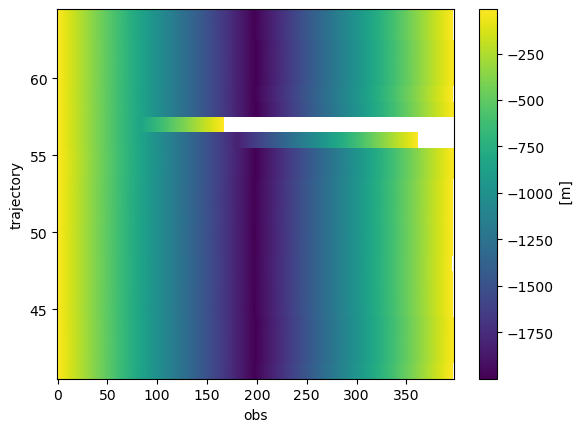

In [167]:
ctd.z.plot()

In [106]:
np.argsort(ctd.time)

<xarray.DataArray 'time' (trajectory: 24, obs: 398)> Size: 76kB
array([[  0,   1,   2, ..., 395, 396, 397],
       [  0,   1,   2, ..., 395, 396, 397],
       [  0,   1,   2, ..., 395, 396, 397],
       ...,
       [  0,   1,   2, ..., 395, 396, 397],
       [  0,   1,   2, ..., 395, 396, 397],
       [  0,   1,   2, ..., 395, 396, 397]], shape=(24, 398))
Coordinates:
  * obs         (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory  (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

In [105]:
timetest=decode_time(ctd)

AttributeError: 'Dataset' object has no attribute 'TIME'

In [112]:
ctd

<xarray.Dataset> Size: 422kB
Dimensions:      (trajectory: 24, obs: 398)
Coordinates:
  * obs          (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory   (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Data variables:
    lat          (trajectory, obs) float32 38kB 5.03 5.03 5.03 ... 9.063 nan
    lon          (trajectory, obs) float32 38kB 49.45 49.45 49.45 ... 55.83 nan
    max_depth    (trajectory, obs) float32 38kB -2e+03 -2e+03 ... -2e+03 nan
    min_depth    (trajectory, obs) float32 38kB -11.0 -11.0 -11.0 ... -11.0 nan
    raising      (trajectory, obs) float32 38kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 nan
    salinity     (trajectory, obs) float32 38kB 34.97 34.97 34.98 ... 35.11 nan
    temperature  (trajectory, obs) float32 38kB 26.26 26.26 26.26 ... 23.07 nan
    time         (trajectory, obs) datetime64[ns] 76kB 2024-09-17T23:12:00 .....
    winch_speed  (trajectory, obs) float32 38kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 nan
    z            (trajectory, obs) float32 38kB -11.0 -21.0 -31.0 ... -13.76 nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        NewParticle_sample_salinity_sample_temperature_ct...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [124]:
# alter this function so that our ctd cast is 1 cast (and thus make from up and down 1 line)
def crosssection(data, xdim='LATITUDE'):
    """convert data for 'cross section' plot (actually projection along x-axis)

    data : list of DataArray
        list of CTD cast datasets
    xdim : str
        horizontal coordinate in output

    x : 1D horizontal coordinate
    y : 1D vertical coordate (pressure)
    temp : output temperature (y,x)
    salt : output salinity (y,x)
    """
    data = [data.time.squeeze() for ds in data]
    data = [data[i] for i in np.argsort([ds[xdim] for ds in data])] # sort by xdim
    x = np.array([ds[xdim].item() for ds in data])
    PMAX = np.max([ds.z.max() for ds in data]) # max pressure measured
    y = np.arange(1,PMAX+1,2)
    # below: one-line function taking in dataset and returning variable interpolated to pressures y
    vinterp = lambda ds, var: np.interp(y, ds.PRES, ds[var], left=np.nan, right=np.nan)
    temp = np.array([vinterp(ds, 'temperature') for ds in data]).T
    salt = np.array([vinterp(ds, 'pressure') for ds in data]).T
    return x,y,temp,salt

In [128]:
x,y,temp,salt = crosssection(ctd, 'lon')

TypeError: string indices must be integers, not 'str'

In [97]:
ctd.lon.isel(obs=0)

<xarray.DataArray 'lon' (trajectory: 24)> Size: 96B
array([49.447758, 49.94838 , 50.490223, 50.90496 , 51.48827 , 51.940838,
       52.39101 , 52.862255, 53.865738, 53.34222 , 52.74742 , 52.247833,
       51.73967 , 51.243473, 50.6545  , 50.255398, 51.256344, 51.830032,
       52.44621 , 53.101532, 53.66887 , 54.41192 , 55.13998 , 55.82837 ],
      dtype=float32)
Coordinates:
    obs         int32 4B 0
  * trajectory  (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Attributes:
    axis:           X
    long_name:      
    standard_name:  longitude
    units:          degrees_east

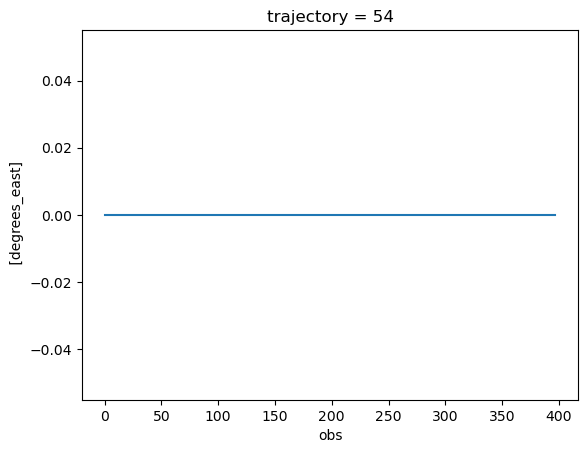

In [94]:
np.isnan(ctd.lon.isel(trajectory=13)).plot()

In [147]:
ctd.time


<xarray.DataArray 'time' (trajectory: 24, obs: 398)> Size: 76kB
array([['2024-09-17T23:12:00.000000000', '2024-09-17T23:12:10.000000000',
        '2024-09-17T23:12:20.000000000', ...,
        '2024-09-18T00:17:50.000000000', '2024-09-18T00:18:00.000000000',
                                  'NaT'],
       ['2024-09-18T00:25:22.415083000', '2024-09-18T00:25:30.000000000',
        '2024-09-18T00:25:40.000000000', ...,
        '2024-09-18T01:31:10.000000000', '2024-09-18T01:31:20.000000000',
        '2024-09-18T01:31:30.000000000'],
       ['2024-09-18T01:37:33.014160000', '2024-09-18T01:37:40.000000000',
        '2024-09-18T01:37:50.000000000', ...,
        '2024-09-18T02:43:20.000000000', '2024-09-18T02:43:30.000000000',
        '2024-09-18T02:43:40.000000000'],
       ...,
       ['2024-09-19T06:28:21.477790000', '2024-09-19T06:28:30.000000000',
        '2024-09-19T06:28:40.000000000', ...,
        '2024-09-19T07:34:10.000000000', '2024-09-19T07:34:20.000000000',
        '2024-09-19T07:34:30.000000000'],
       ['2024-09-19T08:01:50.000000000', '2024-09-19T08:02:00.000000000',
        '2024-09-19T08:02:10.000000000', ...,
        '2024-09-19T09:07:40.000000000', '2024-09-19T09:07:50.000000000',
                                  'NaT'],
       ['2024-09-19T09:27:50.000000000', '2024-09-19T09:28:00.000000000',
        '2024-09-19T09:28:10.000000000', ...,
        '2024-09-19T10:33:40.000000000', '2024-09-19T10:33:50.000000000',
                                  'NaT']],
      shape=(24, 398), dtype='datetime64[ns]')
Coordinates:
  * obs         (obs) int32 2kB 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
  * trajectory  (trajectory) int64 192B 41 42 43 44 45 46 ... 59 60 61 62 63 64
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

In [159]:
ctd.temperature.isel.dropna(trajectory=6)

AttributeError: 'function' object has no attribute 'dropna'

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

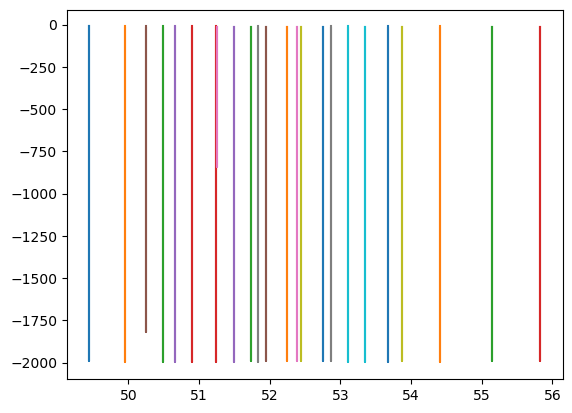

In [165]:
obs = 398
traj = 24

temp=[]
#depth=np.zeros(24)

for i in range(24):
    temp = ctd.temperature.isel(trajectory=i).dropna
    depth = ctd.z.isel(trajectory=i)
    x = ctd.lon.isel(trajectory=i)
    #plt.plot(temp, depth0)
    plt.plot(x,depth)
plt.pcolormesh(x, depth0, temp, cmap=cmocean.cm.thermal)
    
    

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

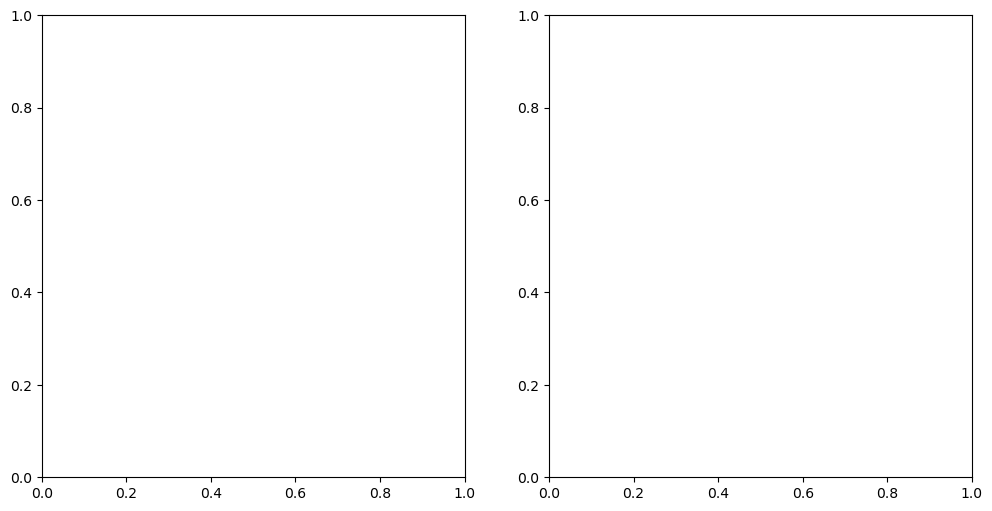

In [81]:
# Plotting Section
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Creating pcolormesh plots
temp_plot = ax[0].pcolormesh(ctd.lon, ctd.z, ctd.temperature[0:8], cmap=cmocean.cm.thermal)
#salt_plot = ax[1].pcolormesh(ctd.lon, ctd.z, ctd.salinity[0:8], cmap=cmocean.cm.haline)

plt.show()

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.MaskedArray with masked values

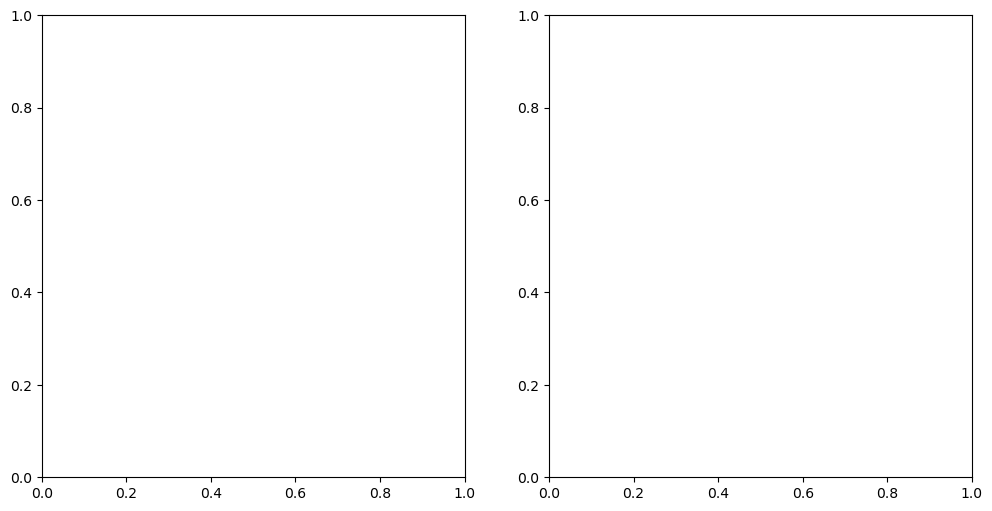

In [67]:
# Plotting Section
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Creating pcolormesh plots
temp_plot = ax[0].pcolormesh(ctd.lon, ctd.z, ctd.temperature[0:8], cmap=cmocean.cm.thermal)
salt_plot = ax[1].pcolormesh(ctd.lon, ctd.z, ctd.salinity[0:8], cmap=cmocean.cm.haline)

# Adding colorbars
cb_temp = fig.colorbar(temp_plot, ax=ax[0], label='Temperature [°C]')
cb_salt = fig.colorbar(salt_plot, ax=ax[1], label='Salinity [PSU]')

# Adding labels and title
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Temperature Profile")
ax[1].set_xlabel("Latitude")
ax[1].set_ylabel("Depth (m)")
ax[1].set_title("Salinity Profile")

# Adding grid
for a in ax:
    a.grid(True, linestyle='--', alpha=0.5)
    for x_val in x:
        a.axvline(x=x_val, color='w', linestyle=':')

# Saving the figure
#plt.savefig("ocean_profiles.png", dpi=300)
plt.show()

ValueError: cannot reshape array of size 3178 into shape (2046,8)

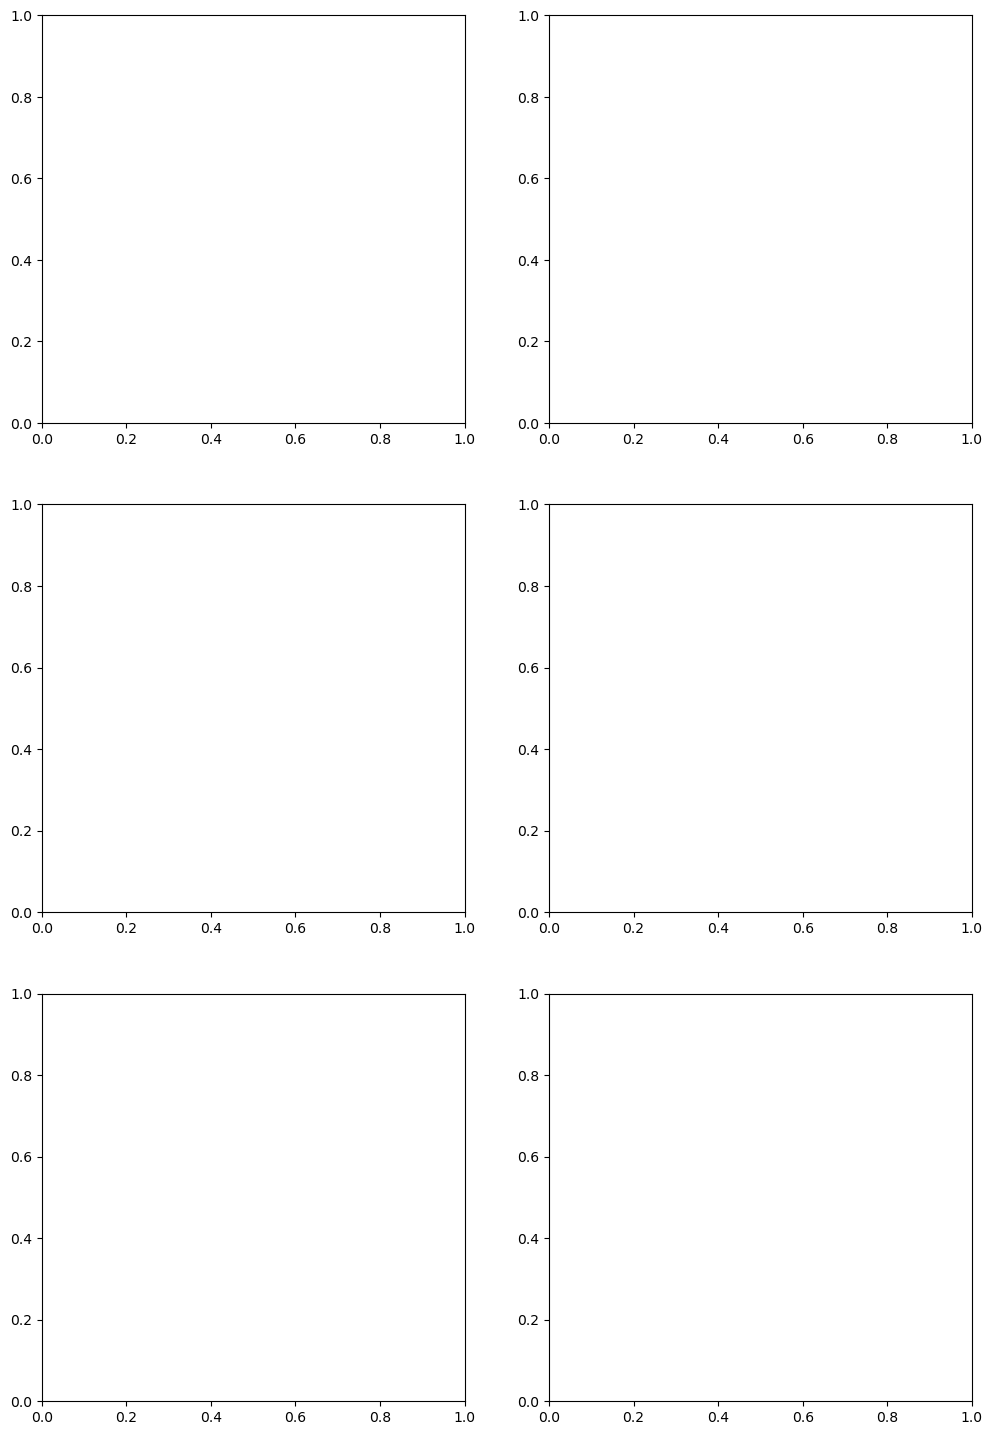

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# Ensure depth values are negative (if not already)
#ctd.z = np.abs(ctd.z) * -1  

# Number of transects
num_transects = 3
casts_per_transect = 8

fig, axes = plt.subplots(num_transects, 2, figsize=(12, 6 * num_transects))

for i in range(num_transects):
    start_idx = i * casts_per_transect
    end_idx = start_idx + casts_per_transect

    # Extract data for the transect
    lat = ctd.lat[start_idx:end_idx, :].values.flatten()
    depth = ctd.z[start_idx:end_idx, :].values.flatten()
    temp = ctd.temperature[start_idx:end_idx, :].values.flatten()
    salt = ctd.salinity[start_idx:end_idx, :].values.flatten()

    # Remove NaN values
    mask = ~np.isnan(lat) & ~np.isnan(depth) & ~np.isnan(temp) & ~np.isnan(salt)
    lat, depth, temp, salt = lat[mask], depth[mask], temp[mask], salt[mask]

    # Reshape into 2D grid for pcolormesh (assuming casts are aligned)
    lat_2d, depth_2d = np.meshgrid(np.unique(lat), np.unique(depth))

    # Interpolate temperature and salinity onto the grid
    temp_2d = temp.reshape(len(np.unique(depth)), len(np.unique(lat)))
    salt_2d = salt.reshape(len(np.unique(depth)), len(np.unique(lat)))

    # Plot temperature
    temp_plot = axes[i, 0].pcolormesh(lat_2d, depth_2d, temp_2d, cmap=cmocean.cm.thermal, shading='auto')
    cb_temp = fig.colorbar(temp_plot, ax=axes[i, 0], label='Temperature [°C]')

    # Plot salinity
    salt_plot = axes[i, 1].pcolormesh(lat_2d, depth_2d, salt_2d, cmap=cmocean.cm.haline, shading='auto')
    cb_salt = fig.colorbar(salt_plot, ax=axes[i, 1], label='Salinity [PSU]')

    # Set labels and titles
    axes[i, 0].set_xlabel("Latitude")
    axes[i, 0].set_ylabel("Depth (m)")
    axes[i, 0].set_title(f"Transect {i+1}: Temperature Profile")

    axes[i, 1].set_xlabel("Latitude")
    axes[i, 1].set_ylabel("Depth (m)")
    axes[i, 1].set_title(f"Transect {i+1}: Salinity Profile")

    # Flip y-axis so depth increases downward
    axes[i, 0].invert_yaxis()
    axes[i, 1].invert_yaxis()

plt.tight_layout()
plt.show()


In [71]:
import numpy as np
import xarray as xr
import cmocean
import matplotlib.pyplot as plt

# Selecting the data during ascent (adjust slice as needed)
trup = dict(trajectory=slice(200, None))  
ctd_up = ctd.isel(trup)  # Select ascending portion

def interp_1d(fp, xp, x):
    """Interpolate fp(xp) to new depths x."""
    return np.interp(x, xp, fp)

# Define new depth levels every 10 meters
zlev = np.arange(-5, -2000, -10)

# Apply interpolation to CTD variables
ctd_interp = xr.apply_ufunc(
    interp_1d,
    ctd_up,  # CTD dataset
    ctd_up.z,  # Depth coordinate
    zlev,  # New depth levels
    input_core_dims=[["trajectory"], ["trajectory"], ["zlev"]],
    output_core_dims=[f["zlev"]],
    exclude_dims=set(["trajectory"]),
    vectorize=True,
    keep_attrs=True,
    on_missing_core_dim="copy",
)

# Drop old depth variable and set new depth coordinate
ctd_interp = ctd_interp.drop_vars("z").assign_coords(
    {"z": ("zlev", zlev, ctd_interp.z.attrs)}
)


ValueError: array of sample points is empty